<h2><p style="font-family: Time New Roman">Introduction to Data Analysis<br/><br/>by Burns Keontae</p><h2/>
$$\newcommand{\C}{\mathbb{C}} \newcommand{\R}{\mathbb{R}} \newcommand{\Z}{\mathbb{Z}} \newcommand{\Q}{\mathbb{Q}} \newcommand{\P}{\mathbb{P}}
\newcommand{\F}{\mathbb{F}} \newcommand{\N}{\mathbb{N}} \newcommand{\E}{\mathbb{E}}$$

<p style="text-align: justify;font-family: Time New Roman"><b>Pre-Work:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Make your comment here)</p>

In [1]:
from IPython.display import IFrame
import pandas as pd
import matplotlib.pyplot as plt
import os  
import numpy as np
import re 

In [2]:
url='https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes';
IFrame(url, width=800, height=400);

In [3]:
isocodes=pd.read_html(url, encoding='utf-8')[0];
isocodes

ISO 3166[1]                              Unnamed: 1_level_0  \
         Country name[5]                          Official state name[6]   
0            Afghanistan             The Islamic Republic of Afghanistan   
1          Åland Islands                                           Åland   
2                Albania                         The Republic of Albania   
3                Algeria     The People's Democratic Republic of Algeria   
4         American Samoa                 The Territory of American Samoa   
..                   ...                                             ...   
266    Wallis and Futuna  The Territory of the Wallis and Futuna Islands   
267  Western Sahara [ai]            The Sahrawi Arab Democratic Republic   
268                Yemen                           The Republic of Yemen   
269               Zambia                          The Republic of Zambia   
270             Zimbabwe                        The Republic of Zimbabwe   

      Unnamed: 2_level_0                                      ISO 3166-1[2]  \
    Sovereignty[6][7][8]                                    Alpha-2 code[5]   
0        UN member state  .mw-parser-output .monospaced{font-family:mono...   
1                Finland                                                 AX   
2        UN member state                                                 AL   
3        UN member state                                                 DZ   
4          United States                                                 AS   
..                   ...                                                ...   
266               France                                                 WF   
267        Disputed [aj]                                                 EH   
268      UN member state                                                 YE   
269      UN member state                                                 ZM   
270      UN member state                                                 ZW   

                                                ISO 3166-2[3]  \
    Alpha-3 code[5] Numeric code[5] Subdivision code links[3]   
0               AFG             004             ISO 3166-2:AF   
1               ALA             248             ISO 3166-2:AX   
2               ALB             008             ISO 3166-2:AL   
3               DZA             012             ISO 3166-2:DZ   
4               ASM             016             ISO 3166-2:AS   
..              ...             ...                       ...   
266             WLF             876             ISO 3166-2:WF   
267             ESH             732             ISO 3166-2:EH   
268             YEM             887             ISO 3166-2:YE   
269             ZMB             894             ISO 3166-2:ZM   
270             ZWE             716             ISO 3166-2:ZW   

    Unnamed: 7_level_0  
     Internet ccTLD[9]  
0                  .af  
1                  .ax  
2                  .al  
3                  .dz  
4                  .as  
..                 ...  
266                .wf  
267               [ak]  
268                .ye  
269                .zm  
270                .zw  

[271 rows x 8 columns]

In [4]:
isocodes=isocodes.droplevel(0,axis=1);
isocodes.head()

,Country name[5],Official state name[6],Sovereignty[6][7][8],Alpha-2 code[5],Alpha-3 code[5],Numeric code[5],Subdivision code links[3],Internet ccTLD[9]
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as


In [5]:
headers=isocodes.columns;
headers=[c[:c.find('[')] for c in headers];
headers

['Country name',
 'Official state name',
 'Sovereignty',
 'Alpha-2 code',
 'Alpha-3 code',
 'Numeric code',
 'Subdivision code links',
 'Internet ccTLD']

In [6]:
isocodes.columns=headers;
isocodes.head()

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,004,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as


In [7]:
isocodes['Subdivision code links']

0      ISO 3166-2:AF
1      ISO 3166-2:AX
2      ISO 3166-2:AL
3      ISO 3166-2:DZ
4      ISO 3166-2:AS
           ...      
266    ISO 3166-2:WF
267    ISO 3166-2:EH
268    ISO 3166-2:YE
269    ISO 3166-2:ZM
270    ISO 3166-2:ZW
Name: Subdivision code links, Length: 271, dtype: object

In [8]:
isocodes['Alpha-2 code original'] = isocodes['Alpha-2 code']
isocodes['Alpha-2 code'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes.head()

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax,AX
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS


In [9]:
url3='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita';
IFrame(url3, width=800, height=400);

In [10]:
gdppc_wiki=pd.read_html(url3, encoding='utf-8')[1];
gdppc_wiki

Country/Territory UN Region IMF[5][6][7]       World Bank[8]  \
              Country/Territory UN Region     Estimate  Year      Estimate   
0                  Luxembourg *    Europe       141587  2022        134754   
1               Liechtenstein *    Europe            —     —             —   
2                   Singapore *      Asia       131426  2022        116487   
3                     Ireland *    Europe       131034  2022        106456   
4                      Monaco *    Europe            —     —             —   
..                          ...       ...          ...   ...           ...   
225                  DR Congo *    Africa         1328  2022          1219   
226                   Somalia *    Africa         1322  2022          1303   
227  Central African Republic *    Africa         1088  2022          1021   
228               South Sudan *    Africa          934  2022          1235   
229                   Burundi *    Africa          865  2022           793   

          CIA[9][10][11]        
     Year       Estimate  Year  
0    2021         110300  2020  
1       —         139100  2009  
2    2021          93400  2020  
3    2021          89700  2020  
4       —         115700  2015  
..    ...            ...   ...  
225  2021           1100  2020  
226  2021            800  2020  
227  2021            900  2020  
228  2015           1600  2017  
229  2021            700  2020  

[230 rows x 8 columns]

In [11]:
gdppc_wiki.columns = ['Country_name', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA'];
gdppc_wiki.head()

,Country_name,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA
0,Luxembourg *,Europe,141587,2022,134754,2021,110300,2020
1,Liechtenstein *,Europe,—,—,—,—,139100,2009
2,Singapore *,Asia,131426,2022,116487,2021,93400,2020
3,Ireland *,Europe,131034,2022,106456,2021,89700,2020
4,Monaco *,Europe,—,—,—,—,115700,2015


In [12]:
gdppc_wiki['Country_name']=gdppc_wiki['Country_name'].str.replace('*',' ', regex=True).str.strip()
gdppc_wiki

,Country_name,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA
0,Luxembourg,Europe,141587,2022,134754,2021,110300,2020
1,Liechtenstein,Europe,—,—,—,—,139100,2009
2,Singapore,Asia,131426,2022,116487,2021,93400,2020
3,Ireland,Europe,131034,2022,106456,2021,89700,2020
4,Monaco,Europe,—,—,—,—,115700,2015
...,...,...,...,...,...,...,...,...
225,DR Congo,Africa,1328,2022,1219,2021,1100,2020
226,Somalia,Africa,1322,2022,1303,2021,800,2020
227,Central African Republic,Africa,1088,2022,1021,2021,900,2020
228,South Sudan,Africa,934,2022,1235,2015,1600,2017


In [13]:
gdppc_wiki.dtypes

Country_name    object
UN Region       object
gdppc_IMF       object
year_IMF        object
gdppc_WB        object
year_WB         object
gdppc_CIA        int64
year_CIA        object
dtype: object

In [14]:
for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('Ã¢Â€Â”', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')

In [15]:
gdppc_wiki.dtypes

Country_name     object
UN Region        object
gdppc_IMF       float64
year_IMF          Int64
gdppc_WB        float64
year_WB           Int64
gdppc_CIA         int64
year_CIA         object
dtype: object

In [16]:
gdppc_wiki.columns

Index(['Country_name', 'UN Region', 'gdppc_IMF', 'year_IMF', 'gdppc_WB',
       'year_WB', 'gdppc_CIA', 'year_CIA'],
      dtype='object')

In [17]:
isocodes.columns

Index(['Country name', 'Official state name', 'Sovereignty', 'Alpha-2 code',
       'Alpha-3 code', 'Numeric code', 'Subdivision code links',
       'Internet ccTLD', 'Alpha-2 code original'],
      dtype='object')

In [18]:
isocodes.head(2)

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax,AX


In [ ]:
gdppc_wiki.head(1)


In [19]:
merged=isocodes.merge(gdppc_wiki, left_on='Country name', right_on='Country_name')
merged

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country_name,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,Asia,2456.0,2020,2079.0,2020,2000,2020
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania,Europe,17858.0,2022,15646.0,2021,13300,2020
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria,Africa,13324.0,2022,12038.0,2021,10700,2020
3,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS,American Samoa,Oceania,NaN,<NA>,NaN,<NA>,11200,2016
4,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra,Europe,65372.0,2022,NaN,<NA>,49900,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu,Oceania,2858.0,2022,3105.0,2021,2800,2020
172,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf,WF,Wallis and Futuna,Oceania,NaN,<NA>,NaN,<NA>,3800,2004
173,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen,Asia,2136.0,2022,3689.0,2013,2500,2017
174,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia,Africa,3808.0,2022,3624.0,2021,3300,2020


In [20]:
merged.shape

(176, 17)

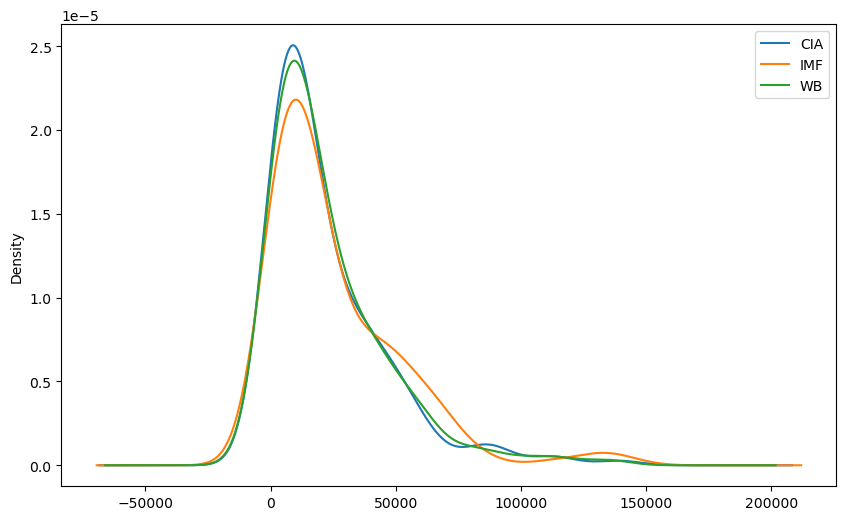

In [21]:
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(10,6));
merged.gdppc_CIA.plot.kde(ax=ax, label='CIA');
merged.gdppc_IMF.plot.kde(ax=ax, label='IMF');
merged.gdppc_WB.plot.kde(ax=ax, label='WB');
ax.legend();

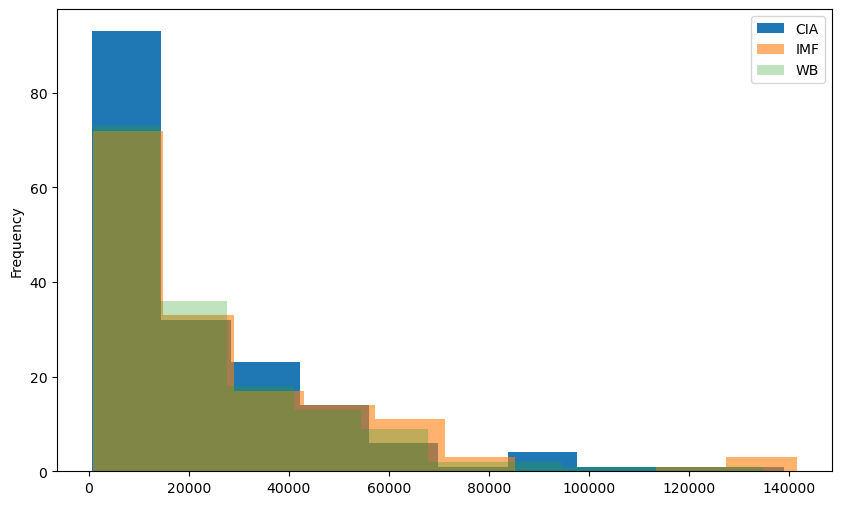

In [22]:
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(10,6));
merged.gdppc_CIA.plot.hist(ax=ax,label='CIA');
merged.gdppc_IMF.plot.hist(ax=ax,label='IMF',alpha=0.6);
merged.gdppc_WB.plot.hist(ax=ax,label='WB',alpha=0.3);
ax.legend();

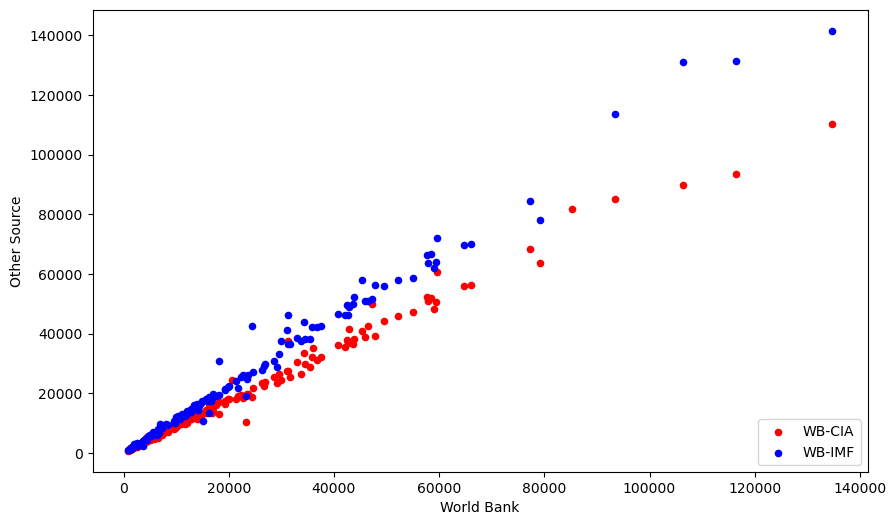

In [23]:
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(10,6));
merged.plot.scatter(x='gdppc_WB',y='gdppc_CIA',ax=ax,label='WB-CIA',c='r');
merged.plot.scatter(x='gdppc_WB',y='gdppc_IMF',ax=ax,label='WB-IMF',c='b');
ax.set_xlabel('World Bank');
ax.set_ylabel('Other Source');
ax.legend(loc='lower right');

<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 1:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cleaned dataset named pop, by replacing header, and removing the [] and letter character from Country_name elements.</p>

In [24]:
url2='https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)';
IFrame(url, width=800, height=400);

In [25]:
pop=pd.read_html(url2, encoding='utf-8')[0];
pop

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [26]:
pop.columns


Index(['Country / Area', 'UN continentalregion[4]',
       'UN statisticalsubregion[4]', 'Population(1 July 2018)',
       'Population(1 July 2019)', 'Change'],
      dtype='object')

In [27]:
pop.columns=['Country_name', 'UN continental region', 
            'UN statistical subregion','Population (1 July 2018)',
            'Population (1 July 2019)','Change'];
pop

,Country_name,UN continental region,UN statistical subregion,Population (1 July 2018),Population (1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [28]:
a=pop['Country_name'].tolist()
a

['China[a]',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Germany',
 'Turkey',
 'Iran',
 'Thailand',
 'United Kingdom',
 'France[b]',
 'Italy',
 'South Africa',
 'Tanzania[c]',
 'Myanmar',
 'Kenya',
 'South Korea',
 'Colombia',
 'Spain[d]',
 'Argentina',
 'Uganda',
 'Ukraine[e]',
 'Algeria',
 'Sudan',
 'Iraq',
 'Afghanistan',
 'Poland',
 'Canada',
 'Morocco',
 'Saudi Arabia',
 'Uzbekistan',
 'Peru',
 'Malaysia',
 'Angola',
 'Mozambique',
 'Yemen',
 'Ghana',
 'Nepal',
 'Venezuela',
 'Madagascar',
 'North Korea',
 'Ivory Coast',
 'Cameroon',
 'Australia[f]',
 'Taiwan[g]',
 'Niger',
 'Sri Lanka',
 'Burkina Faso',
 'Mali',
 'Romania',
 'Malawi',
 'Chile',
 'Kazakhstan',
 'Zambia',
 'Guatemala',
 'Ecuador',
 'Netherlands[h]',
 'Syria',
 'Cambodia',
 'Senegal',
 'Chad',
 'Somalia[i]',
 'Zimbabwe',
 'Guinea',
 'Rwanda',
 'Benin',
 'Tunisia',
 'Belgi

In [29]:
a[0]=re.sub("[\(\[].*?[\)\]]", "", a[0])
a

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Germany',
 'Turkey',
 'Iran',
 'Thailand',
 'United Kingdom',
 'France[b]',
 'Italy',
 'South Africa',
 'Tanzania[c]',
 'Myanmar',
 'Kenya',
 'South Korea',
 'Colombia',
 'Spain[d]',
 'Argentina',
 'Uganda',
 'Ukraine[e]',
 'Algeria',
 'Sudan',
 'Iraq',
 'Afghanistan',
 'Poland',
 'Canada',
 'Morocco',
 'Saudi Arabia',
 'Uzbekistan',
 'Peru',
 'Malaysia',
 'Angola',
 'Mozambique',
 'Yemen',
 'Ghana',
 'Nepal',
 'Venezuela',
 'Madagascar',
 'North Korea',
 'Ivory Coast',
 'Cameroon',
 'Australia[f]',
 'Taiwan[g]',
 'Niger',
 'Sri Lanka',
 'Burkina Faso',
 'Mali',
 'Romania',
 'Malawi',
 'Chile',
 'Kazakhstan',
 'Zambia',
 'Guatemala',
 'Ecuador',
 'Netherlands[h]',
 'Syria',
 'Cambodia',
 'Senegal',
 'Chad',
 'Somalia[i]',
 'Zimbabwe',
 'Guinea',
 'Rwanda',
 'Benin',
 'Tunisia',
 'Belgium'

In [30]:
for i in range(len(a)):
    a[i]=re.sub("[\(\[].*?[\)\]]", "", a[i])
a

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Germany',
 'Turkey',
 'Iran',
 'Thailand',
 'United Kingdom',
 'France',
 'Italy',
 'South Africa',
 'Tanzania',
 'Myanmar',
 'Kenya',
 'South Korea',
 'Colombia',
 'Spain',
 'Argentina',
 'Uganda',
 'Ukraine',
 'Algeria',
 'Sudan',
 'Iraq',
 'Afghanistan',
 'Poland',
 'Canada',
 'Morocco',
 'Saudi Arabia',
 'Uzbekistan',
 'Peru',
 'Malaysia',
 'Angola',
 'Mozambique',
 'Yemen',
 'Ghana',
 'Nepal',
 'Venezuela',
 'Madagascar',
 'North Korea',
 'Ivory Coast',
 'Cameroon',
 'Australia',
 'Taiwan',
 'Niger',
 'Sri Lanka',
 'Burkina Faso',
 'Mali',
 'Romania',
 'Malawi',
 'Chile',
 'Kazakhstan',
 'Zambia',
 'Guatemala',
 'Ecuador',
 'Netherlands',
 'Syria',
 'Cambodia',
 'Senegal',
 'Chad',
 'Somalia',
 'Zimbabwe',
 'Guinea',
 'Rwanda',
 'Benin',
 'Tunisia',
 'Belgium',
 'Bolivia',
 'Cuba',
 

In [31]:
pop['Country_name']=a
pop

,Country_name,UN continental region,UN statistical subregion,Population (1 July 2018),Population (1 July 2019),Change
0,China,Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands,Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau,Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City,Europe,Southern Europe,801,799,−0.25%


<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 2:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Merged the dataset named isocodes with the dataset named pop to form a new dataset name merged2.</p>

In [32]:
merged2=isocodes.merge(pop, left_on='Country name', right_on='Country_name')
merged2

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country_name,UN continental region,UN statistical subregion,Population (1 July 2018),Population (1 July 2019),Change
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania,Europe,Southern Europe,2882740,2880917,−0.06%
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%
3,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra,Europe,Southern Europe,77006,77142,+0.18%
4,Angola,The Republic of Angola,UN member state,AO,AGO,024,ISO 3166-2:AO,.ao,AO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%
151,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%
152,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen,Asia,Western Asia,28498683,29161922,+2.33%
153,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%


<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 3:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Merged the dataset merged2 with dataset gdppc_wiki to form dataset named merged3.</p>

In [33]:
merged3=merged2.merge(gdppc_wiki, left_on='Country_name', 
                      right_on='Country_name');
merged3

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country_name,...,Population (1 July 2018),Population (1 July 2019),Change,UN Region,gdppc_IMF,year_IMF,gdppc_WB,year_WB,gdppc_CIA,year_CIA
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,...,37171921,38041754,+2.34%,Asia,2456.0,2020,2079.0,2020,2000,2020
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania,...,2882740,2880917,−0.06%,Europe,17858.0,2022,15646.0,2021,13300,2020
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria,...,42228408,43053054,+1.95%,Africa,13324.0,2022,12038.0,2021,10700,2020
3,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra,...,77006,77142,+0.18%,Europe,65372.0,2022,NaN,<NA>,49900,2015
4,Angola,The Republic of Angola,UN member state,AO,AGO,024,ISO 3166-2:AO,.ao,AO,Angola,...,30809787,31825295,+3.30%,Africa,7455.0,2022,6581.0,2021,6200,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,Uzbekistan,...,32476244,32981716,+1.56%,Asia,9478.0,2022,8497.0,2021,7000,2020
151,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu,...,292680,299882,+2.46%,Oceania,2858.0,2022,3105.0,2021,2800,2020
152,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen,...,28498683,29161922,+2.33%,Asia,2136.0,2022,3689.0,2013,2500,2017
153,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia,...,17351708,17861030,+2.94%,Africa,3808.0,2022,3624.0,2021,3300,2020


<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 4:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;creating file paths and folders in those locations. </p>

In [34]:
path = './data/'
pathout = './data/'
pathgraphs = './graphs/'

try: 
    os.mkdir(path) 
except OSError as error: 
    print("Folder already exists.")

try: 
    os.mkdir(pathgraphs) 
except OSError as error: 
    print("Folder already exists.")

Folder already exists.
Folder already exists.


<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 5:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Exports the merged3 dataset to csv format to './data/Wiki_Data'. </p>

In [35]:
merged3.to_csv('./data/Wiki_Data', sep='\t')

<p style="text-align: justify;font-family: Time New Roman"><b>Exercise 6:</b><br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Plotted the estimated GDP figure from the IMF against the population data of 2019, with four different regression plots.</p>

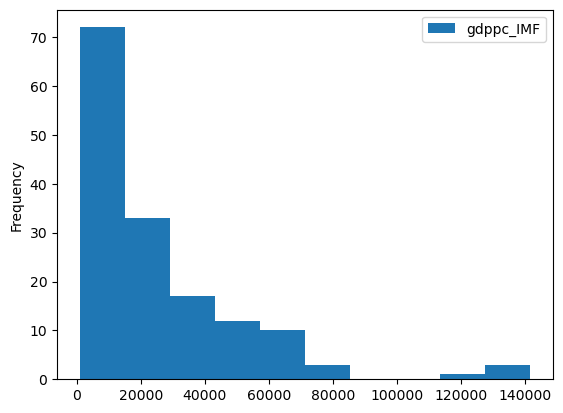

In [36]:
merged3.plot(x='Population (1 July 2019)',y='gdppc_IMF',kind='hist')
plt.savefig("./graphs/output1.png")

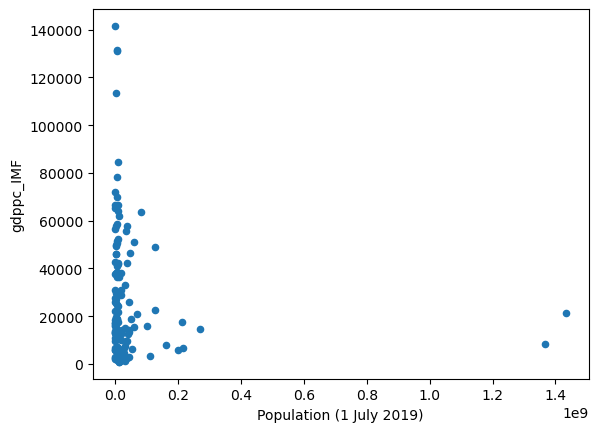

In [37]:
merged3.plot( x='Population (1 July 2019)', y='gdppc_IMF', kind='scatter')
plt.savefig("./graphs/output2.png")

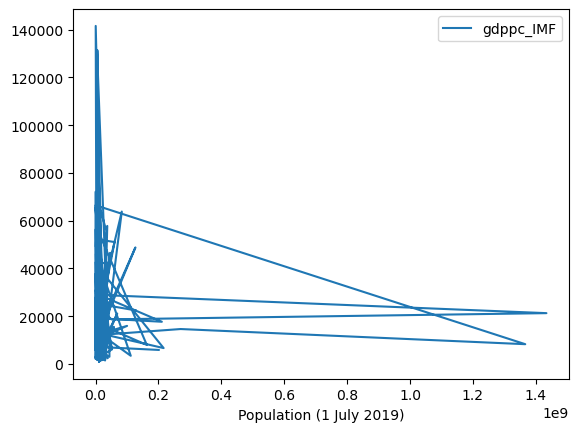

In [38]:
merged3.plot( x='Population (1 July 2019)', y='gdppc_IMF', kind='line')
plt.savefig("./graphs/output3.png")

<AxesSubplot:ylabel='Density'>

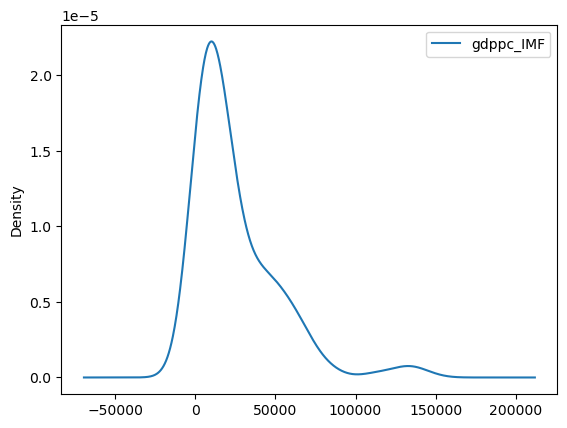

In [39]:
merged3.plot( x='Population (1 July 2019)', y='gdppc_IMF', kind='kde')